In [1]:
%%capture
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

In [2]:
import os
os.makedirs('/content/raw', exist_ok = True)
if not os.path.exists('/content/Project_data'):
    !wget -qq 'https://drive.usercontent.google.com/download?id=1ehyrYBQ5rbQQe6yL4XbLWe3FMvuVUGiL&authuser=0&confirm=t&uuid=faf8eb67-a465-4b76-80b1-5b88a80636ac&at=APZUnTXrM6uktCZvJt_HJpJYg4M0%3A1705871212413' -O /content/raw/data.zip
    !unzip -qq /content/raw/data.zip

In [3]:
os.chdir('/content/drive/MyDrive/Gesture Recognition TF/src')

## Helper

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('icefire')

import numpy as np
from configs.config import Config
from models.cnn_3d import conv3D, conv3Dxnorm, trial
from train.main import Trainer

def plot_performance(path, suffix = None):
    if suffix is None:
      log_df = pd.read_csv(os.path.join(path, 'training.log'), sep = ',')
    else:
      log_df = pd.read_csv(os.path.join(path, f'training{suffix}.log'), sep = ',')
    fig, axes = plt.subplots(1, 2, figsize = (12, 4))
    sns.lineplot(data = log_df, x = 'epoch', y = 'loss', ax = axes[0], label = 'train_loss')
    sns.lineplot(data = log_df, x = 'epoch', y = 'val_loss', ax = axes[0], label = 'val_loss')
    axes[0].set(xlabel = 'epoch', ylabel = 'loss', title = 'Loss profile')
    sns.lineplot(data = log_df, x = 'epoch', y = 'categorical_accuracy', ax = axes[1], label = 'train_accuracy')
    sns.lineplot(data = log_df, x = 'epoch', y = 'val_categorical_accuracy', ax = axes[1], label = 'val_accuracy')
    axes[1].set(xlabel = 'epoch', ylabel = 'accuracy', title = 'accuracy profile')
    plt.tight_layout()
    plt.show()

## Ablation Study

------------------------------------------------------------------------------------------------------------------------
Samples per label: 10
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 120, 120, 16   1312      
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 30, 120, 120, 32   13856     
                             )                                   
                                                                 
 activation (Activation)     (None, 30, 120, 120, 32   0         
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 30, 120, 120, 32   128       
 Normalization)              )               

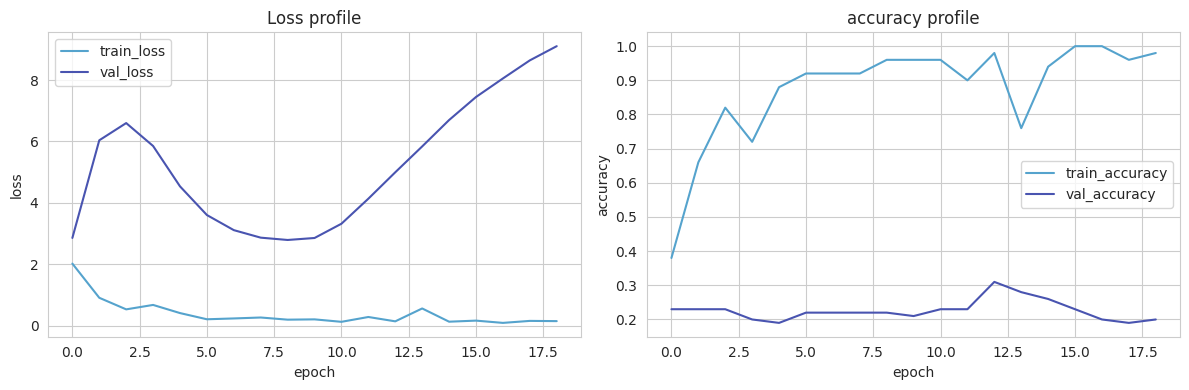


Performance:
train_size : 50
valid_size : 100
train_acc  : 1.0
val_acc    : 0.31

------------------------------------------------------------------------------------------------------------------------
Samples per label: 25
Epoch 1/30
13/13 [==============================] - 32s 2s/step - loss: 1.9983 - categorical_accuracy: 0.3600 - val_loss: 1.5148 - val_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 2/30
13/13 [==============================] - 29s 2s/step - loss: 1.1135 - categorical_accuracy: 0.6080 - val_loss: 1.7134 - val_categorical_accuracy: 0.2400 - lr: 0.0010
Epoch 3/30
13/13 [==============================] - 37s 3s/step - loss: 0.6610 - categorical_accuracy: 0.7120 - val_loss: 2.7905 - val_categorical_accuracy: 0.2700 - lr: 0.0010
Epoch 4/30
13/13 [==============================] - 29s 2s/step - loss: 0.5784 - categorical_accuracy: 0.7840 - val_loss: 3.9029 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 5/30
13/13 [==============================] - ETA: 0s - loss

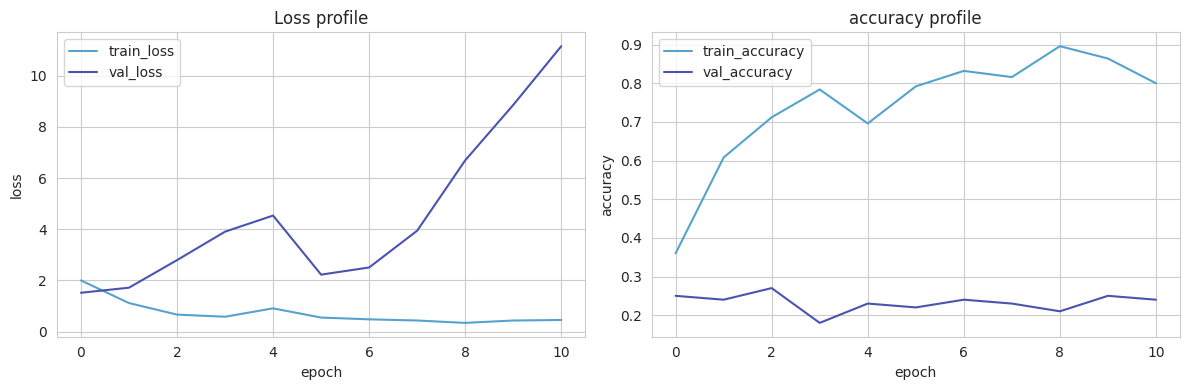


Performance:
train_size : 125
valid_size : 100
train_acc  : 0.896
val_acc    : 0.27

------------------------------------------------------------------------------------------------------------------------
Samples per label: 50
Epoch 1/30
25/25 [==============================] - 50s 2s/step - loss: 1.8116 - categorical_accuracy: 0.3640 - val_loss: 5.8589 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 2/30
25/25 [==============================] - 44s 2s/step - loss: 1.0735 - categorical_accuracy: 0.5880 - val_loss: 1.5843 - val_categorical_accuracy: 0.3000 - lr: 0.0010
Epoch 3/30
25/25 [==============================] - 53s 2s/step - loss: 1.0078 - categorical_accuracy: 0.6000 - val_loss: 1.5383 - val_categorical_accuracy: 0.3400 - lr: 0.0010
Epoch 4/30
25/25 [==============================] - 53s 2s/step - loss: 0.7037 - categorical_accuracy: 0.7440 - val_loss: 6.1035 - val_categorical_accuracy: 0.1800 - lr: 0.0010
Epoch 5/30
25/25 [==============================] - 53s 2s/step

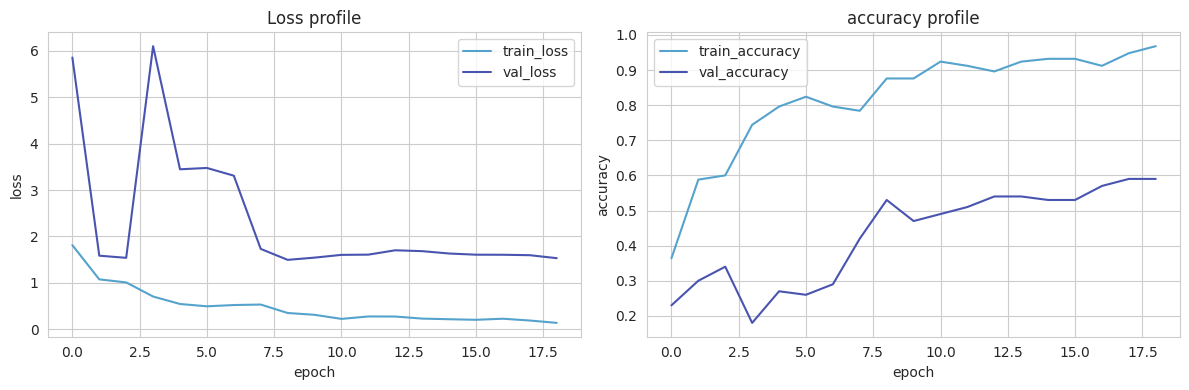


Performance:
train_size : 250
valid_size : 100
train_acc  : 0.968
val_acc    : 0.59

------------------------------------------------------------------------------------------------------------------------
Samples per label: 75
Epoch 1/30
38/38 [==============================] - 63s 2s/step - loss: 1.8413 - categorical_accuracy: 0.3920 - val_loss: 10.5508 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 2/30
38/38 [==============================] - 68s 2s/step - loss: 1.5224 - categorical_accuracy: 0.4667 - val_loss: 2.6380 - val_categorical_accuracy: 0.2800 - lr: 0.0010
Epoch 3/30
38/38 [==============================] - 59s 2s/step - loss: 1.2472 - categorical_accuracy: 0.5253 - val_loss: 2.5844 - val_categorical_accuracy: 0.3000 - lr: 0.0010
Epoch 4/30
38/38 [==============================] - 68s 2s/step - loss: 1.1137 - categorical_accuracy: 0.5627 - val_loss: 9.1791 - val_categorical_accuracy: 0.2500 - lr: 0.0010
Epoch 5/30
38/38 [==============================] - 69s 2s/ste

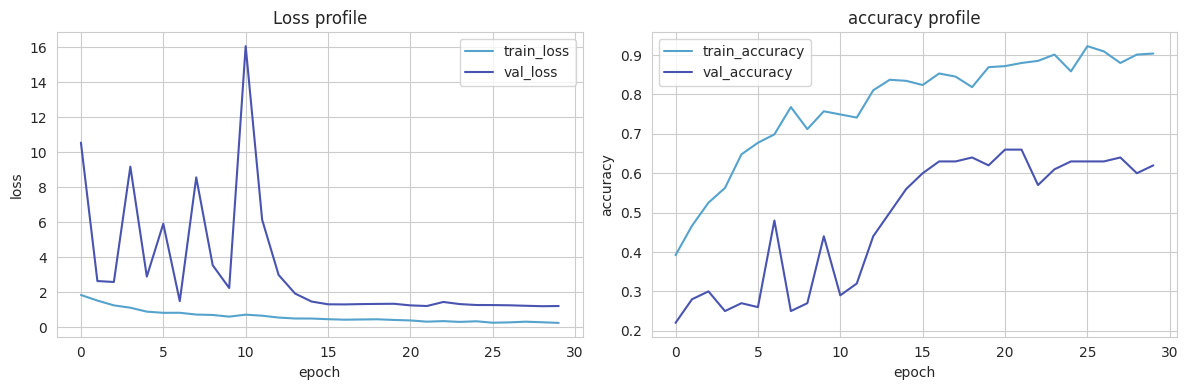


Performance:
train_size : 375
valid_size : 100
train_acc  : 0.922667
val_acc    : 0.66

------------------------------------------------------------------------------------------------------------------------
Samples per label: 100
Epoch 1/30
50/50 [==============================] - 83s 2s/step - loss: 1.9527 - categorical_accuracy: 0.3240 - val_loss: 16.8024 - val_categorical_accuracy: 0.2200 - lr: 0.0010
Epoch 2/30
50/50 [==============================] - 86s 2s/step - loss: 1.3751 - categorical_accuracy: 0.4520 - val_loss: 4.5288 - val_categorical_accuracy: 0.2600 - lr: 0.0010
Epoch 3/30
50/50 [==============================] - 77s 2s/step - loss: 1.0525 - categorical_accuracy: 0.6140 - val_loss: 1.9220 - val_categorical_accuracy: 0.3100 - lr: 0.0010
Epoch 4/30
50/50 [==============================] - 86s 2s/step - loss: 0.8633 - categorical_accuracy: 0.6940 - val_loss: 2.0137 - val_categorical_accuracy: 0.3800 - lr: 0.0010
Epoch 5/30
50/50 [==============================] - 77s 2s

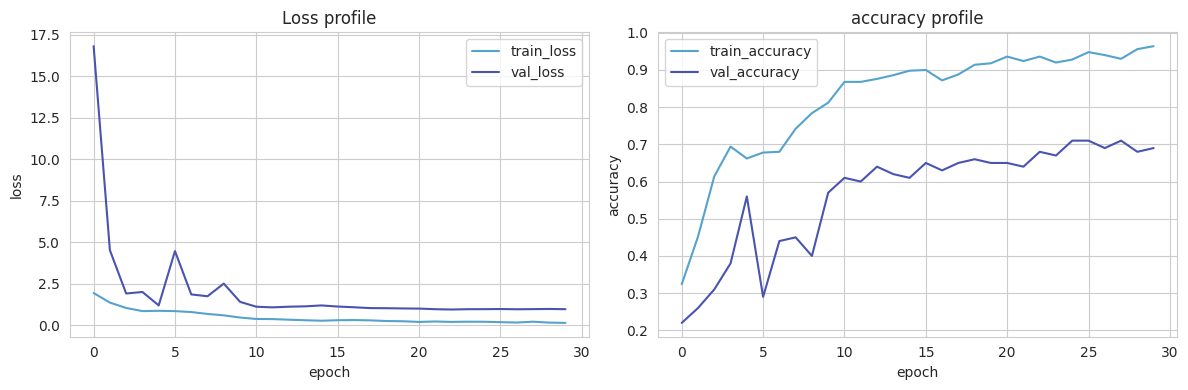


Performance:
train_size : 500
valid_size : 100
train_acc  : 0.964
val_acc    : 0.71

------------------------------------------------------------------------------------------------------------------------
Samples per label: 150
Epoch 1/30
67/67 [==============================] - 104s 2s/step - loss: 1.7625 - categorical_accuracy: 0.3575 - val_loss: 3.9482 - val_categorical_accuracy: 0.2700 - lr: 0.0010
Epoch 2/30
67/67 [==============================] - 100s 1s/step - loss: 1.4159 - categorical_accuracy: 0.4721 - val_loss: 18.6163 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 3/30
67/67 [==============================] - 100s 2s/step - loss: 1.1908 - categorical_accuracy: 0.5535 - val_loss: 16.1992 - val_categorical_accuracy: 0.2300 - lr: 0.0010
Epoch 4/30
67/67 [==============================] - 101s 2s/step - loss: 0.9295 - categorical_accuracy: 0.6440 - val_loss: 2.1624 - val_categorical_accuracy: 0.4000 - lr: 0.0010
Epoch 5/30
67/67 [==============================] - 109s

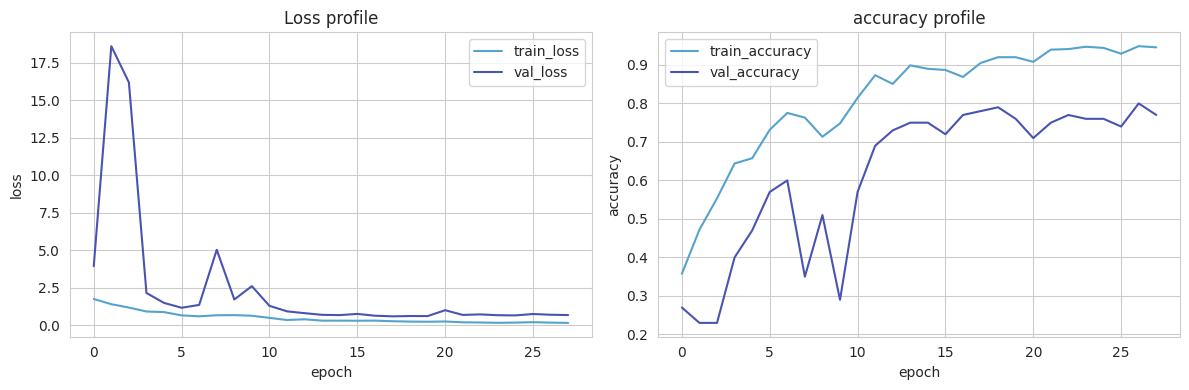


Performance:
train_size : 663
valid_size : 100
train_acc  : 0.948718
val_acc    : 0.8



In [ ]:
results = {}

for s in [10, 25, 50, 75, 100, 150]:

    print('-'*120); print(f'Samples per label: {s}')

    config = Config()
    config.data_dir = '../data'
    config.models_dir = '../models'
    config.model_name = 'ablation_study/cnn3d-30_frames'
    config.colab_clips_dir = '/content/Project_data'
    config.aug_size = 0
    config.ablation_size = s, None
    config.clip_dim = (30, 3, 120, 120)
    config.train_batch_size = 10
    config.valid_batch_size = 64
    config.num_epochs = 30
    config.frame_idx = list(range(30))
    config.save_checkpoint = False
    model = conv3D(conv_filters=(16, 32, 64, 128),
                  kernel_size = (3, 3, 3, 3),
                  dense_nodes=(256,128),
                  dropout=0.25,
                  clip_dim = config.clip_dim)
    if s == 10:
      print(model.summary())
      print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
    history, meta_data = Trainer(config = config, filename_suffix = str(s)).start(model = model)
    plot_performance(path = config.dest_path, suffix = str(s))

    # save results
    results[s] = {
        'train_size' : meta_data['train_size'],
        'valid_size' : meta_data['valid_size'],
        'train_acc'  : np.max(history.history['categorical_accuracy']),
        'val_acc'    : np.max(history.history['val_categorical_accuracy']),
    }

    print(); print('Performance:')
    for k,v in results[s].items(): print(f'{k:10s} : {round(v, 6)}')
    print()

## CNN3D Experiments

## Experiment 5
- Add another convolution layer [16, 32, 64] -> [16, 32, 564, 128]
- Increased epochs from 30 to 40

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 30, 120, 120, 16   1312      
                             )                                   
                                                                 
 conv3d_1 (Conv3D)           (None, 30, 120, 120, 32   13856     
                             )                                   
                                                                 
 activation (Activation)     (None, 30, 120, 120, 32   0         
                             )                                   
                                                                 
 batch_normalization (Batch  (None, 30, 120, 120, 32   128       
 Normalization)              )                                   
                                                                 
 max_pooling3d (MaxPooling3  (None, 15, 60, 60, 32)    0

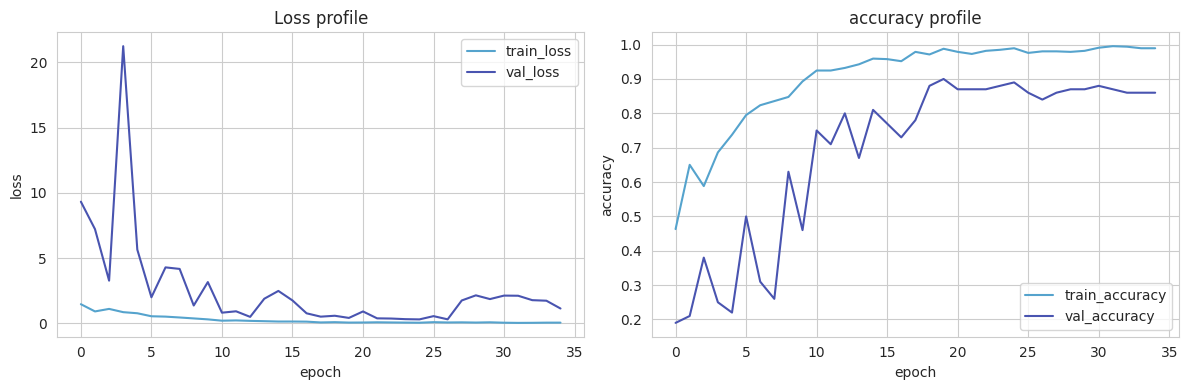

In [5]:
config = Config()
config.data_dir = '../data'
config.models_dir = '../models'
config.model_name = 'cnn3d_exp5'
config.colab_clips_dir = '/content/Project_data'
config.aug_size = 0
config.clip_dim = (30, 3, 120, 120)
config.train_batch_size = 10
config.valid_batch_size = 64
config.num_epochs = 40
config.frame_idx = list(range(30))
config.save_checkpoint = True
model = conv3D(conv_filters=(16, 32, 64, 128),
               kernel_size = (3, 3, 3, 3),
               dense_nodes=(256,128),
               dropout=0.25,
               clip_dim = config.clip_dim)
print(model.summary())
print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
history, meta_data = Trainer(config = config).start(model = model)
plot_performance(path = config.dest_path)

## Experiment 3

In [ ]:
config = Config()
config.data_dir = '../data'
config.models_dir = '../models'
config.model_name = 'cnn3d_exp3'
config.colab_clips_dir = '/content/Project_data'
config.aug_size = 0
config.clip_dim = (20, 3, 120, 120)
config.train_batch_size = 10
config.valid_batch_size = 64
config.num_epochs = 40
config.frame_idx = list(range(5, 25))
config.save_checkpoint = True
model = conv3D(conv_filters=(16, 32, 64, 128),
               kernel_size = (3, 3, 3, 3),
               dense_nodes=(256,128),
               dropout=0.25,
               clip_dim = config.clip_dim)
print(model.summary())
print("Total Params:", f'{round(model.count_params()/1e6,2)}M'); print('-'*120)
history, meta_data = Trainer(config = config).start(model = model)
plot_performance(path = config.dest_path)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d_4 (Conv3D)           (None, 20, 120, 120, 16   1312      
                             )                                   
                                                                 
 conv3d_5 (Conv3D)           (None, 20, 120, 120, 32   13856     
                             )                                   
                                                                 
 activation_6 (Activation)   (None, 20, 120, 120, 32   0         
                             )                                   
                                                                 
 batch_normalization_5 (Bat  (None, 20, 120, 120, 32   128       
 chNormalization)            )                                   
                                                                 
 max_pooling3d_3 (MaxPoolin  (None, 10, 60, 60, 32)   